In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:

city_data = "./raw_data/city_data.csv"
ride_data = "./raw_data/ride_data.csv"

city_df = pd.read_csv(city_data)
driver_count = city_df.groupby(["city", "type"])["driver_count"].sum()
city_grouped = pd.DataFrame({"driver_count" : driver_count}).reset_index()

In [3]:
ride_df = pd.read_csv(ride_data)
ride_df.head()

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


In [18]:


total_rides = ride_df.groupby("city")["ride_id"].count()
avg_fare = ride_df.groupby("city")["fare"].mean()
sum_fare = ride_df.groupby("city")["fare"].sum()

ride_grouped = pd.DataFrame({"total_rides": total_rides
                            ,"avg_fare": avg_fare
                            ,"sum_fares":sum_fare}).reset_index()

merge_df = pd.merge(city_grouped, ride_grouped, how="outer", on="city")
merge_df.head()


,city,type,driver_count,avg_fare,sum_fares,total_rides
0,Alvarezhaven,Urban,21,23.928710,741.79,31
1,Alyssaberg,Urban,67,20.609615,535.85,26
2,Anitamouth,Suburban,16,37.315556,335.84,9
3,Antoniomouth,Urban,21,23.625000,519.75,22
4,Aprilchester,Urban,49,21.981579,417.65,19


In [19]:
urban_df = merge_df.loc[(merge_df["type"] == "Urban")]
suburban_df = merge_df.loc[(merge_df["type"] == "Suburban")]
rural_df = merge_df.loc[(merge_df["type"] == "Rural")]


<function matplotlib.pyplot.show>

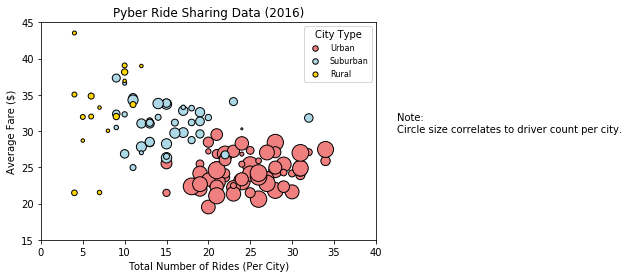

In [20]:


xu= urban_df['total_rides']
yu=urban_df['avg_fare']
su=[4*n for n in urban_df['driver_count']]

xs= suburban_df['total_rides']
ys= suburban_df['avg_fare']
ss=[4*n for n in suburban_df['driver_count']]

xr= rural_df['total_rides']
yr= rural_df['avg_fare']
sr=[4*n for n in rural_df['driver_count']]

uscat = plt.scatter(xu,yu,s=su, c='lightcoral', label = 'Urban', edgecolor = 'black', linewidth=1)
sscat = plt.scatter(xs,ys,s=ss, c='lightblue', label = 'Suburban', edgecolor = 'black', linewidth=1)
rscat = plt.scatter(xr,yr,s=sr, c='gold', label = 'Rural', edgecolor = 'black', linewidth=1)

plt.ylim(15, 45)
plt.xlim(0,40)
lgnd = plt.legend(scatterpoints=1, loc='best', numpoints=1, title="City Type"
           , fontsize=8)

lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]

plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
# plt.annotate("Note:\n Circle size correlates to driver count per city. ", (0,0), (0,-20), xycoords = 'axes fraction',
#              textcoords='offset points', va='center')

plt.figtext(0.95, 0.5, 'Note:\nCircle size correlates to driver count per city.', horizontalalignment='left') 

plt.show

<function matplotlib.pyplot.show>

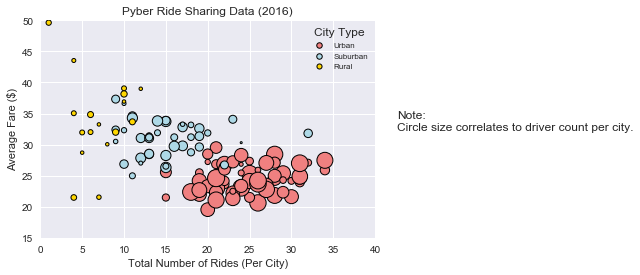

In [31]:
import seaborn as sns
sns.set()
xu= urban_df['total_rides']
yu=urban_df['avg_fare']
su=[4*n for n in urban_df['driver_count']]

xs= suburban_df['total_rides']
ys= suburban_df['avg_fare']
ss=[4*n for n in suburban_df['driver_count']]

xr= rural_df['total_rides']
yr= rural_df['avg_fare']
sr=[4*n for n in rural_df['driver_count']]

plt.scatter(xu,yu,s=su, c='lightcoral', label = 'Urban', edgecolor = 'black', linewidth=1)
plt.scatter(xs,ys,s=ss, c='lightblue', label = 'Suburban', edgecolor = 'black', linewidth=1)
plt.scatter(xr,yr,s=sr, c='gold', label = 'Rural', edgecolor = 'black', linewidth=1)

plt.ylim(15, 50)
plt.xlim(0,40)
lgnd = plt.legend(scatterpoints=1, loc='best', numpoints=1, title="City Type"
           , fontsize=8)

lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]

plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')

plt.figtext(0.95, 0.5, 'Note:\nCircle size correlates to driver count per city.', horizontalalignment='left') 
# plt.savefig("PyberRideSharing_Seaborn.png")
plt.show

In [22]:
merge_df.head()

,city,type,driver_count,avg_fare,sum_fares,total_rides
0,Alvarezhaven,Urban,21,23.928710,741.79,31
1,Alyssaberg,Urban,67,20.609615,535.85,26
2,Anitamouth,Suburban,16,37.315556,335.84,9
3,Antoniomouth,Urban,21,23.625000,519.75,22
4,Aprilchester,Urban,49,21.981579,417.65,19


In [23]:
sum_fares = merge_df.groupby("type")["sum_fares"].sum()
sum_sum_fares = merge_df.groupby("type")["sum_fares"].sum().sum()
fares_pct = sum_fares/sum_sum_fares

fares_pie = pd.DataFrame({"Fares" : sum_fares
                          ,"Pct_Fares" : fares_pct})

fares_pie.head()

,Fares,Pct_Fares
type,,
Rural,4255.09,0.066850
Suburban,19317.88,0.303495
Urban,40078.34,0.629655


<function matplotlib.pyplot.show>

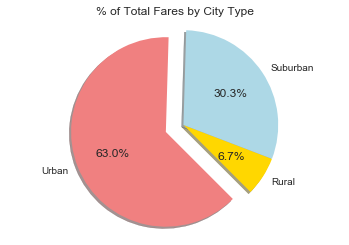

In [39]:
types = ["Rural", "Suburban", "Urban"]
pct_fare = fares_pie["Pct_Fares"]
colors = ["gold", "lightblue",  "lightcoral" ]
explode = (0, 0, 0.2)

plt.pie(pct_fare, explode=explode, labels=types, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=-45)

plt.axis("equal")

plt.title("% of Total Fares by City Type")

plt.show

In [25]:
sum_ride = merge_df.groupby("type")["total_rides"].sum()
sum_sum_rides = merge_df.groupby("type")["total_rides"].sum().sum()
rides_pct = sum_ride/sum_sum_rides

rides_pie = pd.DataFrame({" Total Rides" : sum_ride
                          ,"Pct Rides" : rides_pct})

rides_pie.head()

,Total Rides,Pct Rides
type,,
Rural,125,0.052632
Suburban,625,0.263158
Urban,1625,0.684211


<function matplotlib.pyplot.show>

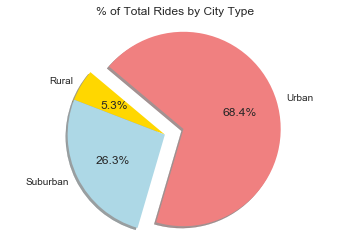

In [34]:
types = ["Rural", "Suburban", "Urban"]
pct_rides = rides_pie["Pct Rides"]
colors = ["gold", "lightblue",  "lightcoral" ]
explode = (0, 0, 0.2)

plt.pie(pct_rides, explode=explode, labels=types, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.axis("equal")

plt.title("% of Total Rides by City Type")

plt.show

In [27]:
sum_drivers = merge_df.groupby("type")["driver_count"].sum()
sum_sum_drivers = merge_df.groupby("type")["driver_count"].sum().sum()
drivers_pct = sum_drivers/sum_sum_drivers

drivers_pie = pd.DataFrame({" Total Drivers" : sum_drivers
                          ,"Pct Drivers" : drivers_pct})

drivers_pie.head()

,Total Drivers,Pct Drivers
type,,
Rural,104,0.031054
Suburban,638,0.190505
Urban,2607,0.778441


<function matplotlib.pyplot.show>

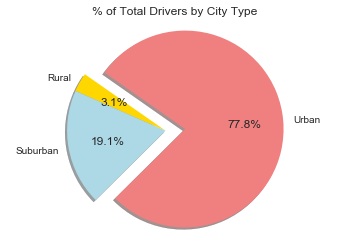

In [36]:
types = ["Rural", "Suburban", "Urban"]
pct_drivers = drivers_pie["Pct Drivers"]
colors = ["gold", "lightblue",  "lightcoral" ]
explode = (0, 0, 0.2)

plt.pie(pct_drivers, explode=explode, labels=types, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=145)

plt.axis("equal")

plt.title("% of Total Drivers by City Type")


plt.show